In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

Mounted at /content/drive


In [2]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_excel('/content/drive/MyDrive/climate/strategic_risk3.xlsx')
data.head()

,Year,English name of company,abbreviated name,Firm age,SOE,Firm size,ROE,Digital Transformation,Strategic Risk Taking,Industry,...,Selling expenses,Administrative expenses,Financial expenses,Total profit,Total assets,Total liability,ROA,Capital expenditure,Long term debt,R&D expenditure
0,2010,2709,1031,20,1,277,0.169287,0,34.03493,5,...,4992875.99,20310560.0,-404998.28125,24635771.44,1.842194e+08,5.500318e+07,0.109659,22917199.70,800000.0,15.567668
1,2011,2709,1031,21,1,322,0.066444,0,30.47950,5,...,5463422.39,18993280.0,-670961.43750,12389715.96,1.963072e+08,5.789790e+07,0.046830,7340797.82,800000.0,14.898110
2,2012,2709,1031,22,1,277,0.053120,1,31.52066,5,...,11400008.27,17053306.0,-557402.00000,10707461.11,1.929136e+08,4.485773e+07,0.040506,18348587.07,800000.0,14.716033
3,2013,2709,1031,23,1,243,0.038862,0,30.47950,5,...,8196765.56,16778132.0,-821411.25000,11203004.67,2.421521e+08,9.764526e+07,0.023938,2161495.81,22800000.0,14.476178
4,2014,2709,1031,24,1,220,0.098499,0,35.99865,5,...,8429412.76,14594404.0,-732405.43750,20665807.64,3.382826e+08,1.808981e+08,0.046189,11212298.00,30800000.0,14.707241


In [ ]:
# Check for null values in each column
null_values = data.isnull().sum()

# Display columns with their null value counts
print("\nNull values in each column:")
print(null_values)


Null values in each column:
Year                       0
English name of company    0
abbreviated name           0
Firm age                   0
SOE                        0
Firm size                  0
ROE                        0
Digital Transformation     0
Strategic Risk Taking      0
Industry                   0
Gross revenue              0
Selling expenses           0
Administrative expenses    0
Financial expenses         0
Total profit               0
Total assets               0
Total liability            0
ROA                        0
Capital expenditure        0
Long term debt             0
R&D expenditure            0
dtype: int64


In [3]:
X = data.drop(['ROE'], axis=1)
y = data['ROE']

# Display the modified feature dataset
print(X)

# Display the target dataset
print(y)


       Year  English name of company  abbreviated name  Firm age  SOE  \
0      2010                     2709              1031        20    1   
1      2011                     2709              1031        21    1   
2      2012                     2709              1031        22    1   
3      2013                     2709              1031        23    1   
4      2014                     2709              1031        24    1   
...     ...                      ...               ...       ...  ...   
11714  2021                     1430               788         2    1   
11715  2021                      981               772         1    1   
11716  2021                     1404              1468         1    1   
11717  2021                     2033              2270         1    1   
11718  2021                     2039              3115         1    1   

       Firm size  Digital Transformation  Strategic Risk Taking  Industry  \
0            277                       0      

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

Cross-Validation RMSE Scores: [0.02235689 0.01984325 0.02337598 0.02115067 0.02973673]
Mean Cross-Validation RMSE: 0.02329270466791037


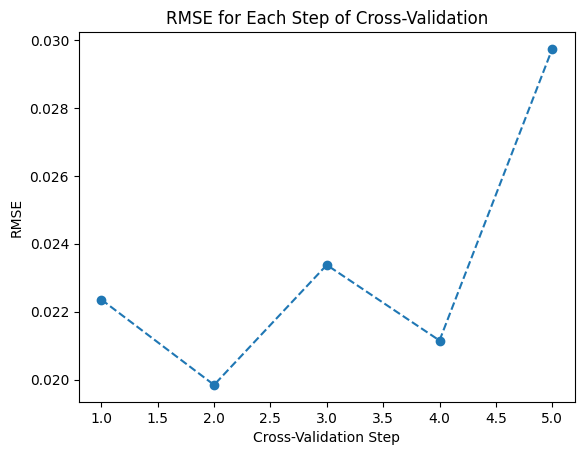

In [ ]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores) ** 0.5
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()

Feature Importances:
                    Feature  Importance
16                      ROA    0.731597
15          Total liability    0.068776
14             Total assets    0.055479
12       Financial expenses    0.024208
13             Total profit    0.019636
9             Gross revenue    0.017547
3                  Firm age    0.014561
17      Capital expenditure    0.007899
19          R&D expenditure    0.007702
5                 Firm size    0.007105
11  Administrative expenses    0.006293
7     Strategic Risk Taking    0.005944
0                      Year    0.005775
18           Long term debt    0.005714
1   English name of company    0.005712
2          abbreviated name    0.005340
10         Selling expenses    0.005122
6    Digital Transformation    0.003399
8                  Industry    0.001210
4                       SOE    0.000983


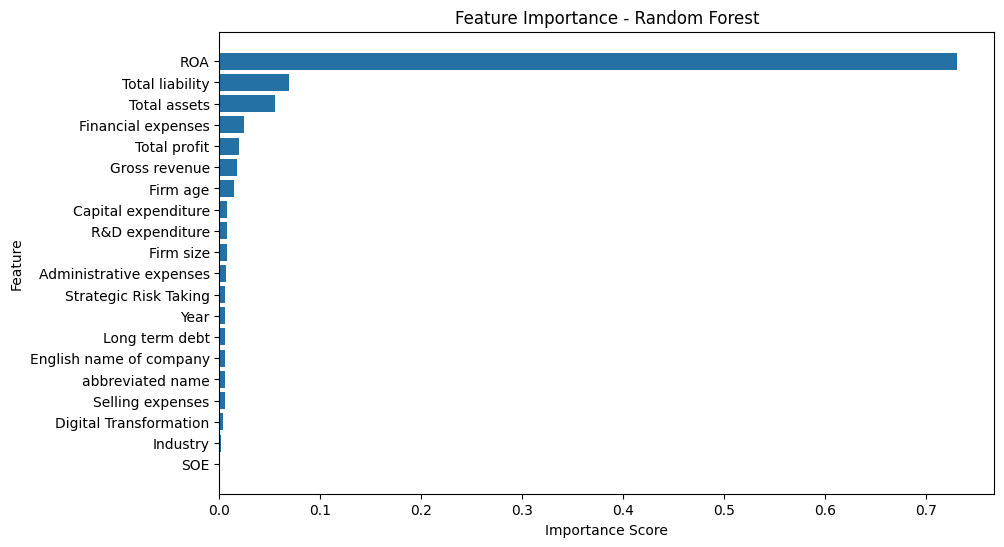

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd

# Train the Random Forest Regressor
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Feature importance
feature_importances = rf.feature_importances_

# Display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

# Optionally, plot feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='#2471a3')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Predict on the test set
y_pred_test = rf_regressor.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 0.0003842653442278555
Mean Absolute Error: 0.009824655931740615


In [ ]:
# Predict on the validation set
y_pred_val = rf_regressor.predict(X_val)

# Calculate evaluation metrics for validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for validation set
print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)


Validation Mean Squared Error: 0.005107380508681279
Validation Mean Absolute Error: 0.0123195833536


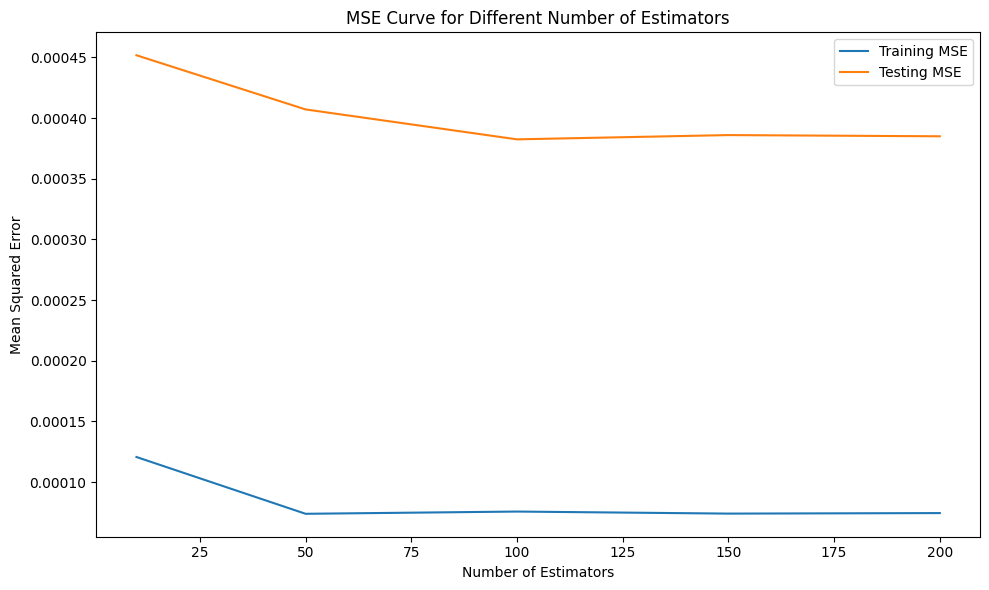

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define a range of number of trees (estimators)
num_estimators = [10, 50, 100, 150, 200]

train_errors = []
test_errors = []



for n in num_estimators:
    # Train the random forest regression model
    model = RandomForestRegressor(n_estimators=n)
    model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(num_estimators, train_errors, label='Training MSE')
plt.plot(num_estimators, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the number of estimators
num_estimators = 100  # You can change this to your desired number

# Create and evaluate Random Forest Regressor with a specific number of estimators
forest_model = RandomForestRegressor(n_estimators=num_estimators, random_state=42)
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)

mae = mean_absolute_error(y_test, forest_pred)
mse = mean_squared_error(y_test, forest_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, forest_pred)  # Import r2_score from sklearn.metrics
rmsle = np.sqrt(np.mean(np.log1p(forest_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - forest_pred) / y_test)) * 100

print(f"\nRandom Forest Regressor Model with {num_estimators} Estimators:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



Random Forest Regressor Model with 100 Estimators:
Mean Absolute Error (MAE): 0.01
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.02
R-squared (R2): 0.87
Root Mean Squared Logarithmic Error (RMSLE): 0.00
Mean Absolute Percentage Error (MAPE): 16.93%


Cross-Validation RMSE Scores: [0.02429402 0.02496242 0.02760426 0.02523874 0.03333866]
Mean Cross-Validation RMSE: 0.027087621856021628


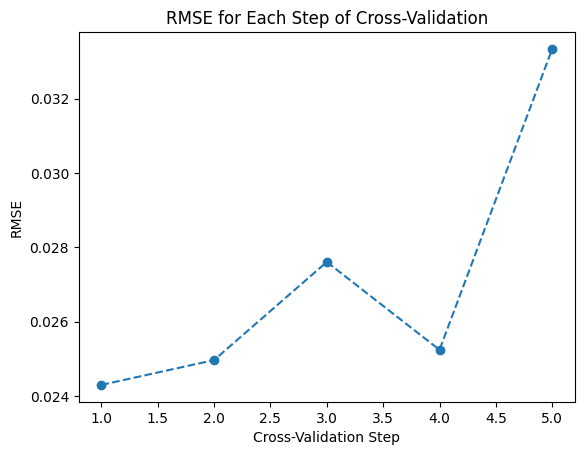

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Create and fit the linear regression model
lr_regressor = LinearRegression()
lr_regressor.fit(X_train, y_train)

# Perform cross-validation for RMSE
cv_scores = cross_val_score(lr_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)  # Calculate RMSE from negative MSE

print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()


In [ ]:
# Predict on the test set using the Linear Regression model
y_pred_test = lr_regressor.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.0006443355281145285
Mean Absolute Error: 0.014699582790861155


In [ ]:
# Predict on the validation set using the Linear Regression model
y_pred_val = lr_regressor.predict(X_val)

# Calculate evaluation metrics for the validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for the validation set
print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)


Validation Mean Squared Error: 0.006163522135828449
Validation Mean Absolute Error: 0.017619669287382254


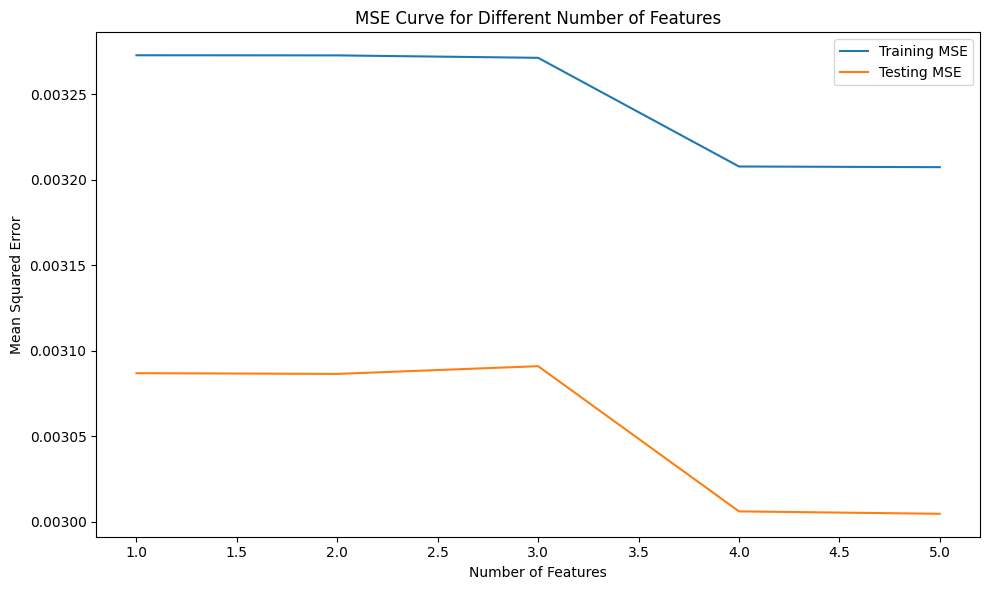

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define a range of numbers of features (attributes)
num_features = [1, 2, 3, 4, 5]

train_errors = []
test_errors = []

for n in num_features:
    # Select the first 'n' features for training and testing
    X_train_subset = X_train.iloc[:, :n]
    X_test_subset = X_test.iloc[:, :n]

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X_train_subset, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train_subset)
    y_test_pred = model.predict(X_test_subset)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(num_features, train_errors, label='Training MSE')
plt.plot(num_features, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create and evaluate a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

mae = mean_absolute_error(y_test, lr_pred)
mse = mean_squared_error(y_test, lr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lr_pred)
rmsle = np.sqrt(np.mean(np.log1p(lr_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - lr_pred) / y_test)) * 100

print(f"\nLinear Regression Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



Linear Regression Model:
Mean Absolute Error (MAE): 0.01
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.03
R-squared (R2): 0.79
Root Mean Squared Logarithmic Error (RMSLE): 0.00
Mean Absolute Percentage Error (MAPE): 43.34%


Cross-Validation RMSE Scores: [0.03717305 0.03763434 0.03896432 0.03729032 0.04290063]
Mean Cross-Validation RMSE: 0.03879253244597244


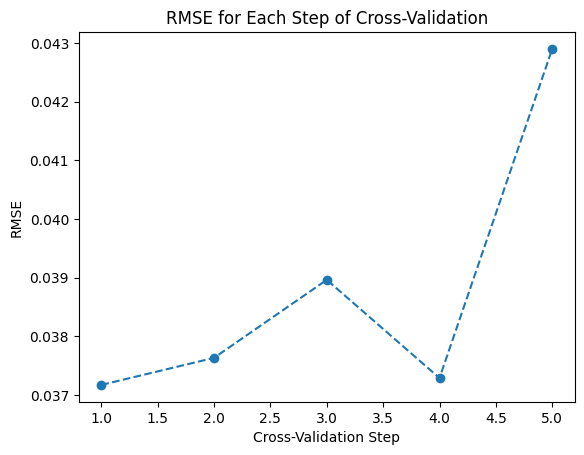

In [ ]:
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

lasso_cv = LassoCV()
lasso_cv.fit(X_train, y_train)
cv_scores = cross_val_score(lasso_cv, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores) ** 0.5
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()


In [ ]:
# Predict on the test set
y_pred_test = lasso_cv.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 0.0014066877165444902
Mean Absolute Error: 0.025945419497289703


In [ ]:
# Predict on the validation set
y_pred_val = lasso_cv.predict(X_val)

# Calculate evaluation metrics for validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for validation set
print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)


Validation Mean Squared Error: 0.0072493808363084744
Validation Mean Absolute Error: 0.028520985207926338


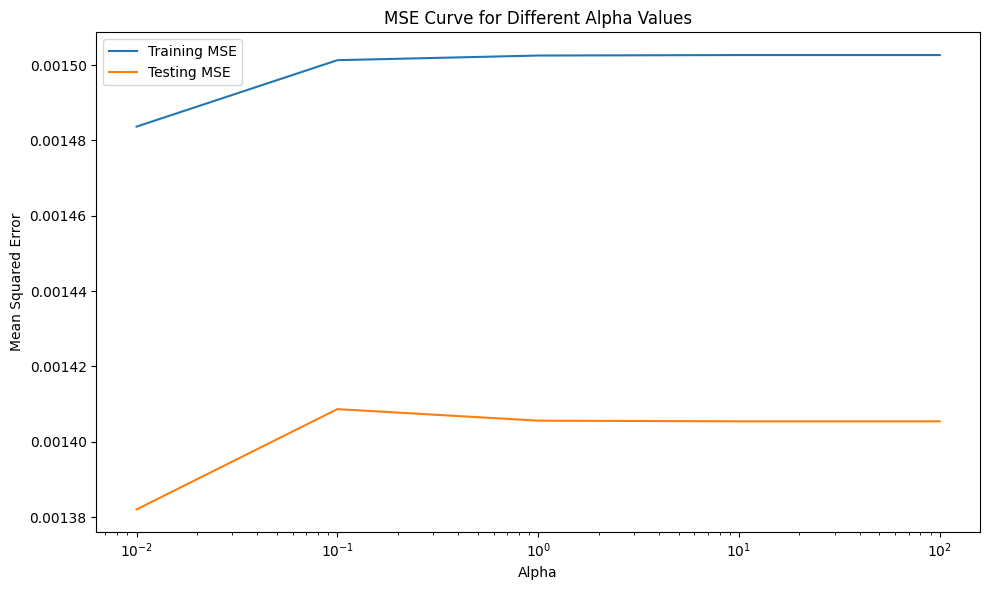

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define a range of alphas
alphas = [0.01, 0.1, 1, 10, 100]

train_errors = []
test_errors = []

for alpha in alphas:
    # Train the Lasso regression model
    model = LassoCV(alphas=[alpha], cv=5)  # LassoCV automatically selects the best alpha through cross-validation
    model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_errors, label='Training MSE')
plt.plot(alphas, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Alpha Values')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.xscale('log')  # Since alphas are on a logarithmic scale
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define hyperparameters
cv_value = 5  # Example value, you can adjust this

# Create and evaluate LassoCV model with hyperparameters
lasso_cv = LassoCV(cv=cv_value)
lasso_cv.fit(X_train, y_train)
lasso_pred = lasso_cv.predict(X_test)

mae = mean_absolute_error(y_test, lasso_pred)
mse = mean_squared_error(y_test, lasso_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lasso_pred)
rmsle = np.sqrt(np.mean(np.log1p(lasso_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - lasso_pred) / y_test)) * 100

print(f"\nLassoCV Model with Hyperparameters:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



LassoCV Model with Hyperparameters:
Mean Absolute Error (MAE): 0.03
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.04
R-squared (R2): 0.54
Root Mean Squared Logarithmic Error (RMSLE): 0.00
Mean Absolute Percentage Error (MAPE): 109.72%


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define hyperparameters for KNN
n_neighbors_value = 5  # Example value, adjust as needed

# Create and evaluate KNeighborsRegressor model with hyperparameters
knn_reg = KNeighborsRegressor(n_neighbors=n_neighbors_value)
knn_reg.fit(X_train, y_train)  # Fit the model on the training data

# Predict using the trained KNN model
knn_pred = knn_reg.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, knn_pred)
mse = mean_squared_error(y_test, knn_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, knn_pred)
rmsle = np.sqrt(np.mean((np.log1p(knn_pred) - np.log1p(y_test)) ** 2))
mape = np.mean(np.abs((y_test - knn_pred) / y_test)) * 100

# Print the evaluation metrics
print(f"\nKNeighbors Regressor Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



KNeighbors Regressor Model:
Mean Absolute Error (MAE): 0.03
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.04
R-squared (R2): 0.38
Root Mean Squared Logarithmic Error (RMSLE): 0.04
Mean Absolute Percentage Error (MAPE): 116.68%


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define hyperparameters for SVR
kernel = 'rbf'  # Example value; options are 'linear', 'poly', 'rbf', 'sigmoid'
C_value = 1.0   # Regularization parameter
epsilon_value = 0.1  # Epsilon-tube within which no penalty is associated

# Create and evaluate SVR model with hyperparameters
svr_reg = SVR(kernel=kernel, C=C_value, epsilon=epsilon_value)
svr_reg.fit(X_train, y_train)  # Fit the model on the training data

# Predict using the trained SVR model
svr_pred = svr_reg.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, svr_pred)
mse = mean_squared_error(y_test, svr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, svr_pred)
rmsle = np.sqrt(np.mean((np.log1p(svr_pred) - np.log1p(y_test)) ** 2))
mape = np.mean(np.abs((y_test - svr_pred) / y_test)) * 100

# Print the evaluation metrics
print(f"\nSupport Vector Regressor (SVR) Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



Support Vector Regressor (SVR) Model:
Mean Absolute Error (MAE): 0.04
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.05
R-squared (R2): 0.13
Root Mean Squared Logarithmic Error (RMSLE): 0.05
Mean Absolute Percentage Error (MAPE): 206.61%


In [ ]:
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression  # Base estimator
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create and evaluate RANSAC Regressor model
ransac = RANSACRegressor(estimator=LinearRegression(),  # Corrected parameter name
                         min_samples=0.9,  # Minimum number of samples for inliers (e.g., 90% of data)
                         residual_threshold=10.0,  # Maximum residual for a data point to be classified as an inlier
                         random_state=42)

ransac.fit(X_train, y_train)  # Fit the model on the training data

# Predict using the trained RANSAC model
ransac_pred = ransac.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, ransac_pred)
mse = mean_squared_error(y_test, ransac_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, ransac_pred)
rmsle = np.sqrt(np.mean((np.log1p(ransac_pred) - np.log1p(y_test)) ** 2))
mape = np.mean(np.abs((y_test - ransac_pred) / y_test)) * 100

# Print the evaluation metrics
print(f"\nRANSAC Regressor Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



RANSAC Regressor Model:
Mean Absolute Error (MAE): 0.01
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.03
R-squared (R2): 0.79
Root Mean Squared Logarithmic Error (RMSLE): 0.02
Mean Absolute Percentage Error (MAPE): 43.34%


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define hyperparameters for Decision Tree
max_depth_value = 5  # Example value, adjust as needed

# Create and evaluate DecisionTreeRegressor model with hyperparameters
dt_reg = DecisionTreeRegressor(max_depth=max_depth_value, random_state=42)
dt_reg.fit(X_train, y_train)  # Fit the model on the training data

# Predict using the trained Decision Tree model
dt_pred = dt_reg.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, dt_pred)
mse = mean_squared_error(y_test, dt_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, dt_pred)
rmsle = np.sqrt(np.mean((np.log1p(dt_pred) - np.log1p(y_test)) ** 2))
mape = np.mean(np.abs((y_test - dt_pred) / y_test)) * 100

# Print the evaluation metrics
print(f"\nDecision Tree Regressor Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



Decision Tree Regressor Model:
Mean Absolute Error (MAE): 0.02
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.03
R-squared (R2): 0.76
Root Mean Squared Logarithmic Error (RMSLE): 0.02
Mean Absolute Percentage Error (MAPE): 25.98%


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create and fit the XGBRegressor model with default hyperparameters
xgb_reg = xgb.XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)  # Fit the model on the training data

# Predict using the trained XGBoost model
xgb_pred = xgb_reg.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, xgb_pred)
mse = mean_squared_error(y_test, xgb_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, xgb_pred)
rmsle = np.sqrt(np.mean((np.log1p(xgb_pred) - np.log1p(y_test)) ** 2))
mape = np.mean(np.abs((y_test - xgb_pred) / y_test)) * 100

# Print the evaluation metrics
print(f"\nXGBoost Regressor Model with Default Hyperparameters:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



XGBoost Regressor Model with Default Hyperparameters:
Mean Absolute Error (MAE): 0.01
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.02
R-squared (R2): 0.90
Root Mean Squared Logarithmic Error (RMSLE): 0.01
Mean Absolute Percentage Error (MAPE): 16.53%


**Proposed model**

Feature Importances:
                    Feature  Importance
16                      ROA    0.674244
14             Total assets    0.076190
15          Total liability    0.069629
9             Gross revenue    0.033695
12       Financial expenses    0.029092
13             Total profit    0.022728
3                  Firm age    0.020665
1   English name of company    0.009133
11  Administrative expenses    0.009024
0                      Year    0.006947
19          R&D expenditure    0.006596
4                       SOE    0.006468
17      Capital expenditure    0.005623
2          abbreviated name    0.005180
8                  Industry    0.004743
18           Long term debt    0.004706
5                 Firm size    0.004361
7     Strategic Risk Taking    0.004325
6    Digital Transformation    0.003491
10         Selling expenses    0.003158


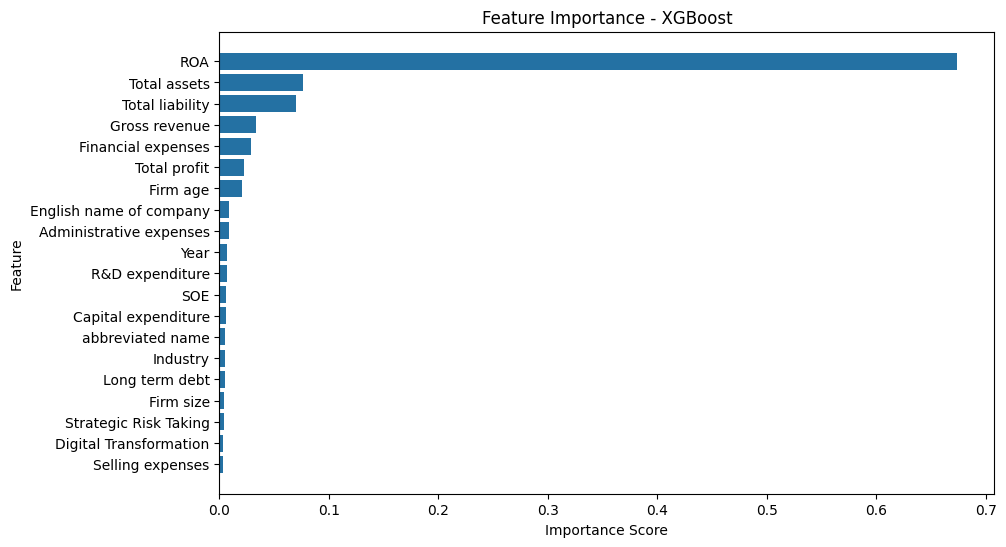

In [ ]:
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Train the XGBRegressor
xgb_reg = xgb.XGBRegressor(random_state=42, n_estimators=100)
xgb_reg.fit(X_train, y_train)

# Feature importance
feature_importances = xgb_reg.feature_importances_

# Display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

# Optionally, plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='#2471a3')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance - XGBoost')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


Feature Importances:
                    Feature  Importance
16                      ROA    0.588581
9             Gross revenue    0.059451
14             Total assets    0.054684
15          Total liability    0.048163
12       Financial expenses    0.036429
3                  Firm age    0.032599
18           Long term debt    0.022464
13             Total profit    0.020818
5                 Firm size    0.017342
4                       SOE    0.016504
0                      Year    0.014868
2          abbreviated name    0.011877
7     Strategic Risk Taking    0.011466
17      Capital expenditure    0.011224
19          R&D expenditure    0.011157
8                  Industry    0.010760
1   English name of company    0.010167
11  Administrative expenses    0.008671
10         Selling expenses    0.007573
6    Digital Transformation    0.005203


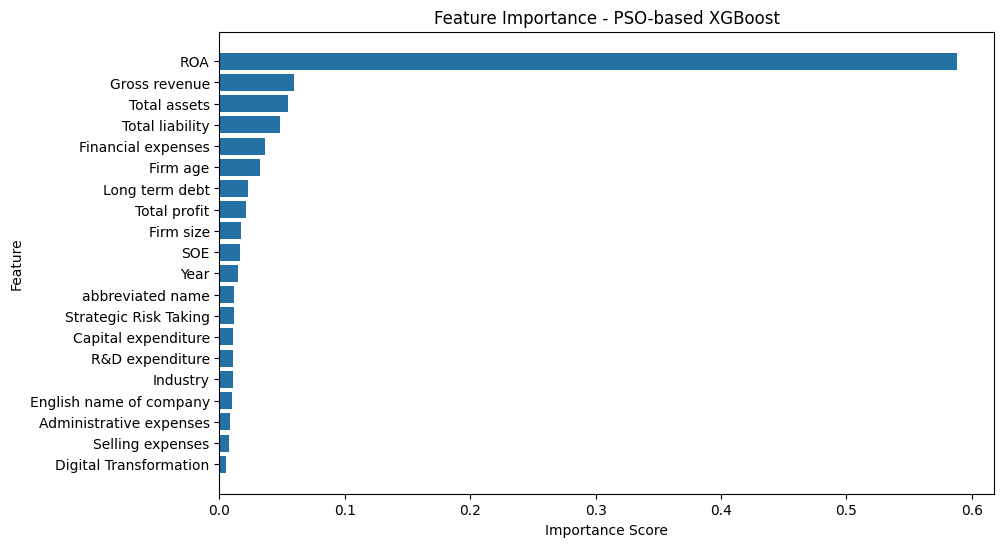

In [25]:
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'xgb_reg_best' is your trained PSO-based XGBoost model
# Extract feature importance from the PSO-based optimized XGBoost model
feature_importances = xgb_reg_best.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

# Optionally, plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='#2471a3')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance - PSO-based XGBoost')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


Cross-Validation RMSE Scores: [0.01756169 0.01741517 0.01822265 0.01785401 0.02565545]
Mean Cross-Validation RMSE: 0.019341792755071075


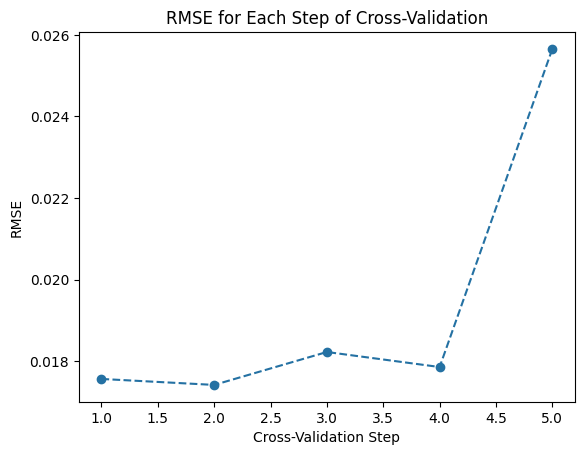

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize the XGBRegressor
xgb_reg = xgb.XGBRegressor(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(xgb_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to RMSE
cv_rmse_scores = np.sqrt(-cv_scores)

# Display the results
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--', color='#2471a3')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()


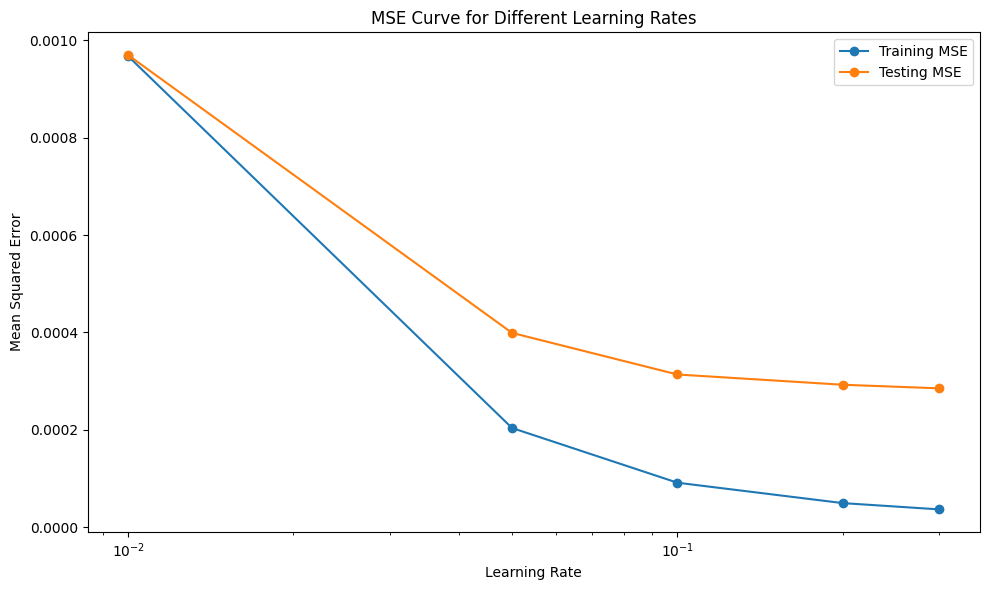

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Define a range of learning rates (analogous to alpha in Lasso)
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.3]

train_errors = []
test_errors = []

for lr in learning_rates:
    # Train the XGBoost model with the specified learning rate
    model = xgb.XGBRegressor(learning_rate=lr, n_estimators=100, max_depth=5, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, train_errors, label='Training MSE', marker='o')
plt.plot(learning_rates, test_errors, label='Testing MSE', marker='o')
plt.title('MSE Curve for Different Learning Rates')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Squared Error')
plt.xscale('log')  # Log scale for learning rates
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define hyperparameters for XGBoost
n_estimators_value = 100  # Number of boosting rounds (trees)
learning_rate_value = 0.1  # Learning rate for boosting
max_depth_value = 5  # Maximum depth of individual trees

# Create and evaluate XGBRegressor model with hyperparameters
xgb_reg = xgb.XGBRegressor(n_estimators=n_estimators_value,
                           learning_rate=learning_rate_value,
                           max_depth=max_depth_value,
                           random_state=42)
xgb_reg.fit(X_train, y_train)  # Fit the model on the training data

# Predict using the trained XGBoost model
xgb_pred = xgb_reg.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, xgb_pred)
mse = mean_squared_error(y_test, xgb_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, xgb_pred)
rmsle = np.sqrt(np.mean((np.log1p(xgb_pred) - np.log1p(y_test)) ** 2))
mape = np.mean(np.abs((y_test - xgb_pred) / y_test)) * 100

# Print the evaluation metrics
print(f"\nXGBoost Regressor Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



XGBoost Regressor Model:
Mean Absolute Error (MAE): 0.01
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.02
R-squared (R2): 0.90
Root Mean Squared Logarithmic Error (RMSLE): 0.01
Mean Absolute Percentage Error (MAPE): 15.92%


In [5]:
!pip install pyswarm


  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=cc655b81cf913748531a6d7ae84a7c6d130debb420389ea29216e721b688ba42
  Stored in directory: /root/.cache/pip/wheels/bb/4f/ec/8970b83323e16aa95034da175454843947376614d6d5e9627f
Successfully built pyswarm


In [17]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pyswarm import pso

# Define the objective function for PSO
def objective_function(params):
    n_estimators, learning_rate, max_depth = int(params[0]), params[1], int(params[2])

    # Train XGBoost model with current hyperparameters
    xgb_reg = xgb.XGBRegressor(n_estimators=n_estimators,
                               learning_rate=learning_rate,
                               max_depth=max_depth,
                               random_state=42)
    xgb_reg.fit(X_train, y_train)

    # Predict and calculate RMSE as the objective function
    xgb_pred = xgb_reg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))

    return rmse  # Minimizing RMSE

# Define search space for hyperparameters
lb = [50, 0.05, 2]
ub = [200, 0.2, 8]

# Run PSO to find optimal hyperparameters
best_params, _ = pso(objective_function, lb, ub, swarmsize=10, maxiter=10)

# Extract optimized hyperparameters
best_n_estimators = int(best_params[0])
best_learning_rate = best_params[1]
best_max_depth = int(best_params[2])

# Train final XGBoost model with optimized hyperparameters
xgb_reg_best = xgb.XGBRegressor(n_estimators=best_n_estimators,
                                learning_rate=best_learning_rate,
                                max_depth=best_max_depth,
                                random_state=42)
xgb_reg_best.fit(X_train, y_train)

# Predict using the optimized model
xgb_pred_best = xgb_reg_best.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, xgb_pred_best)
mse = mean_squared_error(y_test, xgb_pred_best)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, xgb_pred_best)
rmsle = np.sqrt(np.mean((np.log1p(xgb_pred_best) - np.log1p(y_test)) ** 2))
mape = np.mean(np.abs((y_test - xgb_pred_best) / y_test)) * 100

# Print results
print(f"\nOptimized XGBoost Regressor (PSO-Based):")
print(f"Best Hyperparameters - n_estimators: {best_n_estimators}, learning_rate: {best_learning_rate:.4f}, max_depth: {best_max_depth}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Stopping search: maximum iterations reached --> 10

Optimized XGBoost Regressor (PSO-Based):
Best Hyperparameters - n_estimators: 124, learning_rate: 0.0964, max_depth: 5
Mean Absolute Error (MAE): 0.01
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.02
R-squared (R2): 0.91
Root Mean Squared Logarithmic Error (RMSLE): 0.01
Mean Absolute Percentage Error (MAPE): 15.48%


In [18]:
# Install beecolpy in Google Colab
!pip install beecolpy

  Preparing metadata (setup.py) ... done
  Created wheel for beecolpy: filename=beecolpy-2.3.2-py3-none-any.whl size=17964 sha256=6c539047caad56662348790eeae791ced30ee33871e262834e23dc2f01618f78
  Stored in directory: /root/.cache/pip/wheels/6f/00/bb/55023875d7b30110c5f4478420cd5814206dbc9533839160b5
Successfully built beecolpy


In [23]:

# Import required libraries
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from beecolpy import abc
from sklearn.model_selection import train_test_split


# Define the objective function for ABC optimization
def objective(params):
    # Extract and round parameters
    n_estimators = int(round(params[0]))
    learning_rate = params[1]
    max_depth = int(round(params[2]))

    # Enforce parameter bounds
    n_estimators = max(50, min(n_estimators, 200))
    learning_rate = max(0.01, min(learning_rate, 0.3))
    max_depth = max(1, min(max_depth, 10))

    # Create and train XGBoost model
    model = xgb.XGBRegressor(n_estimators=n_estimators,
                             learning_rate=learning_rate,
                             max_depth=max_depth,
                             random_state=42)
    model.fit(X_train, y_train)

    # Predict on validation set
    pred = model.predict(X_val)

    # Return MSE as the objective to minimize
    return mean_squared_error(y_val, pred)

# Define parameter boundaries for ABC
boundaries = [(50, 199.999), (0.01, 0.3), (1, 9.999)]  # [n_estimators, learning_rate, max_depth]

# Initialize and run ABC optimization
abc_obj = abc(objective, boundaries, colony_size=30, scouts=0.5, iterations=10, seed=42)
abc_obj.fit()

# Get optimal parameters
optimal_params = abc_obj.get_solution()
n_estimators_opt = int(round(optimal_params[0]))
learning_rate_opt = optimal_params[1]
max_depth_opt = int(round(optimal_params[2]))

# Ensure parameters are within bounds
n_estimators_opt = max(50, min(n_estimators_opt, 200))
learning_rate_opt = max(0.01, min(learning_rate_opt, 0.3))
max_depth_opt = max(1, min(max_depth_opt, 10))

# Print the optimal parameters
print(f"\nOptimal Parameters from ABC Optimization:")
print(f"n_estimators: {n_estimators_opt}")
print(f"learning_rate: {learning_rate_opt:.4f}")
print(f"max_depth: {max_depth_opt}")

# Train final XGBoost model with optimal parameters on full training data
xgb_reg_opt = xgb.XGBRegressor(n_estimators=n_estimators_opt,
                               learning_rate=learning_rate_opt,
                               max_depth=max_depth_opt,
                               random_state=42)
xgb_reg_opt.fit(X_train, y_train)

# Predict using the trained XGBoost model on test set
xgb_pred_opt = xgb_reg_opt.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, xgb_pred_opt)
mse = mean_squared_error(y_test, xgb_pred_opt)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, xgb_pred_opt)
rmsle = np.sqrt(np.mean((np.log1p(xgb_pred_opt) - np.log1p(y_test)) ** 2))
mape = np.mean(np.abs((y_test - xgb_pred_opt) / y_test)) * 100

# Print the evaluation metrics
print(f"\nXGBoost Regressor Model with ABC Optimization:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Optimal Parameters from ABC Optimization:
n_estimators: 200
learning_rate: 0.1038
max_depth: 4

XGBoost Regressor Model with ABC Optimization:
Mean Absolute Error (MAE): 0.01
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.02
R-squared (R2): 0.90
Root Mean Squared Logarithmic Error (RMSLE): 0.01
Mean Absolute Percentage Error (MAPE): 19.08%


In [29]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create and evaluate BayesianRidge model
bayesian_ridge_reg = BayesianRidge()
bayesian_ridge_reg.fit(X_train, y_train)  # Fit the model on the training data

# Predict using the trained Bayesian Ridge model
bayesian_ridge_pred = bayesian_ridge_reg.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, bayesian_ridge_pred)
mse = mean_squared_error(y_test, bayesian_ridge_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, bayesian_ridge_pred)
rmsle = np.sqrt(np.mean((np.log1p(bayesian_ridge_pred) - np.log1p(y_test)) ** 2))
mape = np.mean(np.abs((y_test - bayesian_ridge_pred) / y_test)) * 100

# Print the evaluation metrics
print(f"\nBayesian Ridge Regression Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



Bayesian Ridge Regression Model:
Mean Absolute Error (MAE): 0.01
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.03
R-squared (R2): 0.79
Root Mean Squared Logarithmic Error (RMSLE): 0.02
Mean Absolute Percentage Error (MAPE): 43.47%
